In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

In [4]:
from utils.data_gen import LDA_predictor, generate_2d_example, generate_2d_4_class_example

from utils.tests import brier_scores

In [5]:
sns.set(
    style="whitegrid",
    font_scale=1.4,
    rc={
        "lines.linewidth": 2,
        #             "axes.facecolor": ".9",
        'figure.figsize': (12, 6)
    })
sns.set_palette('Set2')
matplotlib.rcParams['text.usetex'] = True

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
color1 = np.array([244, 236, 118]) / 256
color2 = np.array([110, 200, 235]) / 256
color3 = np.array([233, 113, 183]) / 256

colors = [color1, color2, color3]

# Data simulation for 4 classes

In [8]:
mu_0 = np.array([-1, -1])
mu_1 = np.array([-1, 1])
mu_2 = np.array([1, -1])
mu_3 = np.array([1, 1])

In [9]:
X, y = generate_2d_4_class_example([0.25, 0.25, 0.25, 0.25], mu_0, mu_1, mu_2, mu_3, 2500)

In [ ]:
clr1 = np.array([233, 113, 150]) / 256
clr2 = np.array([113, 193, 125]) / 256

In [ ]:
np.array([136,174,208]) / 256
clr2 = np.array([255,212,0]) / 256
colors = [clr1,clr2]

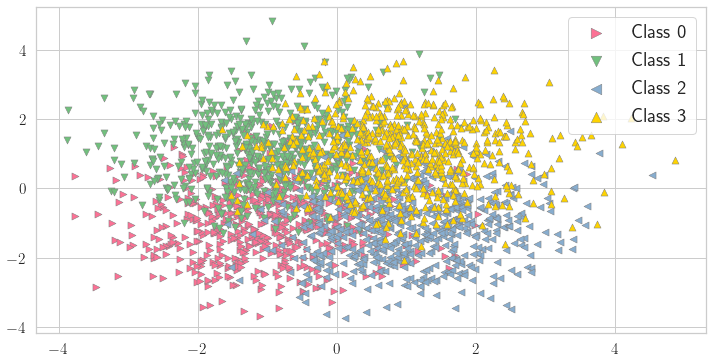

In [24]:
plt.figure(figsize=[12, 6])
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            edgecolor="gray",
            marker='>',
            label='Class 0',
            linewidths=0.5,
            color=np.array([253, 113, 150]) / 256,
            s=50)
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            edgecolor="gray",
            marker='v',
            label='Class 1',
            linewidths=0.5,
            color=np.array([113, 193, 125]) / 256,
            s=50)
plt.scatter(X[y == 2, 0],
            X[y == 2, 1],
            edgecolor="gray",
            marker='<',
            label='Class 2',
            linewidths=0.5,
            color=np.array([136,174,208]) / 256,
            s=50)
plt.scatter(X[y == 3, 0],
            X[y == 3, 1],
            edgecolor="gray",
            marker='^',
            label='Class 3',
            linewidths=0.5,
            color=np.array([255,212,0]) / 256,
            s=50)

plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
# plt.show()
plt.savefig('img/4_class_data_vis.pdf', bbox_inches='tight')

In [25]:
from utils.data_gen import four_classes_LDA_predictor

In [26]:
clf = four_classes_LDA_predictor()
clf.mean_class_0 = mu_0
clf.mean_class_1 = mu_1
clf.mean_class_2 = mu_2
clf.mean_class_3 = mu_3
clf.cov_mat = np.eye(2)
clf.class_prop = [0.25, 0.25, 0.25, 0.25]

In [27]:
pred_probs = clf.predict_proba(X)

In [28]:
pred_probs.shape

(2500, 4)

In [29]:
old = brier_scores(y,pred_probs,n_classes=4)

In [30]:
new = modified_brier_scores(y,pred_probs,n_classes=4)

NameError: name 'modified_brier_scores' is not defined

In [339]:
clf.score(X,y)

0.708

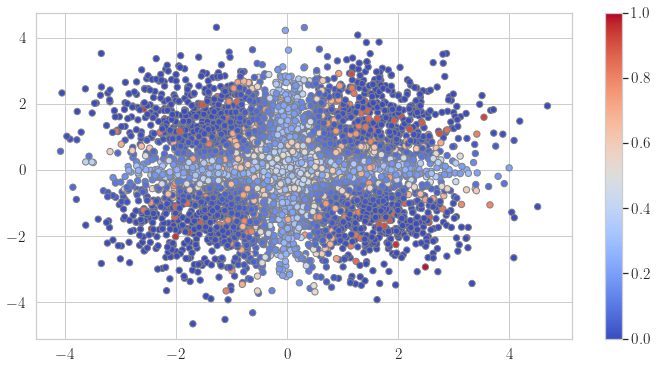

In [345]:
plt.figure(figsize=[12, 6])
plt.scatter(
    X[:, 0],
    X[:, 1],
    edgecolor="gray",
    s=40,
    c=old,
    cmap='coolwarm')
plt.clim(0, 1)
plt.colorbar()
# plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
# plt.show()
plt.savefig('img/4class_brier.pdf', bbox_inches='tight')

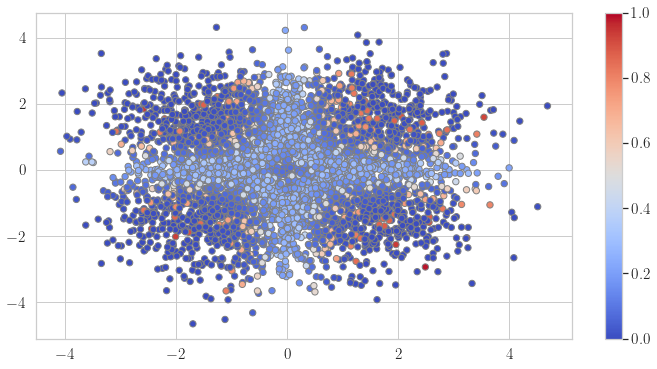

In [346]:
plt.figure(figsize=[12, 6])
plt.scatter(
    X[:, 0],
    X[:, 1],
    edgecolor="gray",
    s=40,
    c=new,
    cmap='coolwarm')
plt.clim(0, 1)
plt.colorbar()
# plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
# plt.show()
plt.savefig('img/4class_brier_modified.pdf', bbox_inches='tight')

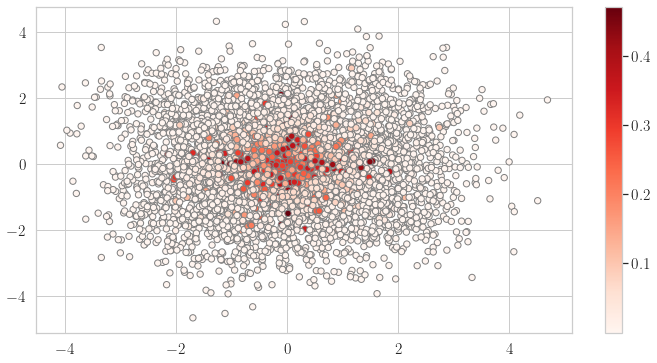

In [347]:
plt.figure(figsize=[12, 6])
plt.scatter(
    X[:, 0],
    X[:, 1],
    edgecolor="gray",
    s=40,
    c=abs(new-old),
    cmap='Reds')
# plt.clim(0, 1)
plt.colorbar()
# plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
# plt.show()
plt.savefig('img/4class_brier_abs_difference.pdf', bbox_inches='tight')

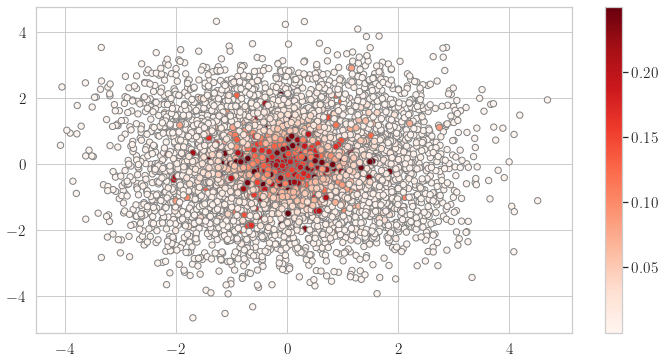

In [352]:
plt.figure(figsize=[12, 6])
plt.scatter(
    X[:, 0],
    X[:, 1],
    edgecolor="gray",
    s=40,
    c=abs(new_2-old),
    cmap='Reds')
# plt.clim(0, 1)
plt.colorbar()
# plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
# plt.show()
plt.savefig('img/4class_brier_abs_difference_2.pdf', bbox_inches='tight')

In [349]:
from utils.tests import loss_double

In [350]:
new_2 = loss_double(y,pred_probs,n_classes=4)

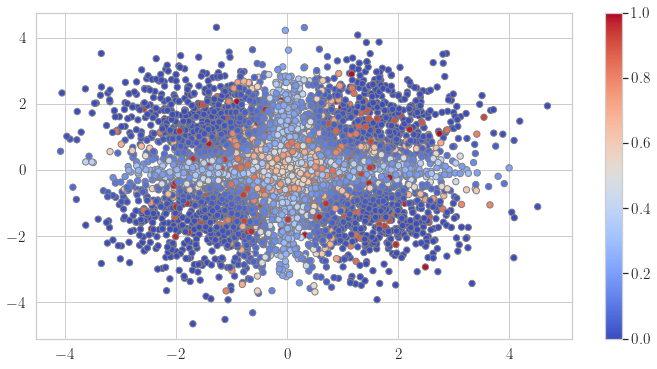

In [351]:
plt.figure(figsize=[12, 6])
plt.scatter(
    X[:, 0],
    X[:, 1],
    edgecolor="gray",
    s=40,
    c=new_2,
    cmap='coolwarm')
plt.clim(0, 1)
plt.colorbar()
# plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
# plt.show()

plt.savefig('img/4class_brier_modified_2.pdf', bbox_inches='tight')

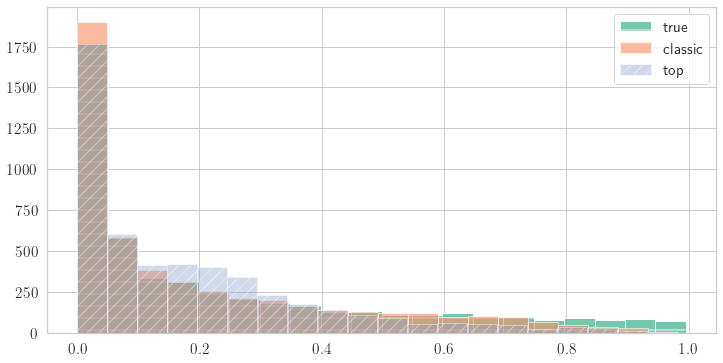

In [356]:
plt.hist(new_2, alpha=0.9, bins=20, hatch='-', label='true')
plt.hist(old, alpha=0.6, bins=20, label='classic')
plt.hist(new, alpha=0.4, bins=20, hatch='//', label='top')
plt.legend()

In [643]:
n_x_bins, n_y_bins = 80,80
x_boundary_1, x_boundary_2 = -3,3 
y_boundary_1, y_boundary_2 = -3,3

In [644]:
clf = four_classes_LDA_predictor()
clf.mean_class_0 = mu_0
clf.mean_class_1 = mu_1
clf.mean_class_2 = mu_2
clf.mean_class_3 = mu_3
clf.cov_mat = np.eye(2)
clf.class_prop = [0.25,0.25,0.25,0.25]

In [645]:
X, y = generate_2d_4_class_example([0.25,0.25,0.25,0.25], mu_0, mu_1, mu_2, mu_3, 300000)

pred_probs = clf.predict_proba(X)

brier_classic = brier_scores(y,pred_probs,n_classes=4)
brier_top = modified_brier_scores(y,pred_probs,n_classes=4)
brier_true = loss_double(y,pred_probs,n_classes=4)

In [646]:
import scipy

In [647]:
H_classic, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(
        x=X[:, 0],
        y=X[:, 1],
        values=brier_classic,
        statistic='mean',
        bins=[n_x_bins, n_y_bins],
        range=[[x_boundary_1, x_boundary_2], [y_boundary_1, y_boundary_2]])

H_top, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(
        x=X[:, 0],
        y=X[:, 1],
        values=brier_top,
        statistic='mean',
        bins=[n_x_bins, n_y_bins],
        range=[[x_boundary_1, x_boundary_2], [y_boundary_1, y_boundary_2]])

H_true, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(
        x=X[:, 0],
        y=X[:, 1],
        values=brier_true,
        statistic='mean',
        bins=[n_x_bins, n_y_bins],
        range=[[x_boundary_1, x_boundary_2], [y_boundary_1, y_boundary_2]])



In [648]:
H.shape

(20, 20)

In [649]:
len(xedges)

81

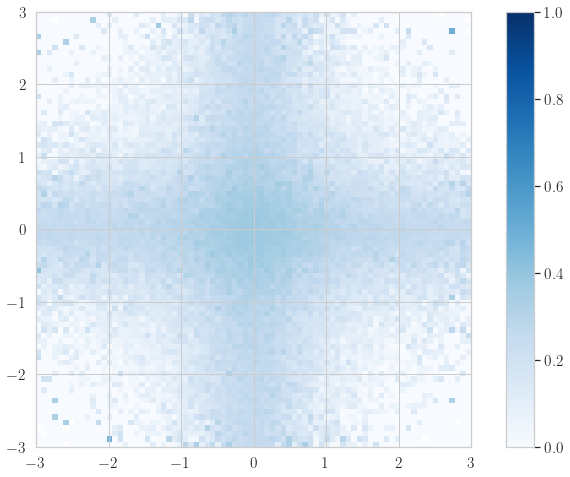

In [650]:
plt.figure(figsize=[8,8])
im = plt.imshow(H_classic,cmap="Blues",extent=[-3,3,-3,3])
plt.clim(0,1)
cax = plt.axes([0.95, 0.125, 0.05,0.755 ])
plt.colorbar(mappable=im, cax=cax)
plt.savefig('img/2d_bininng_brier_classic.pdf', bbox_inches='tight')

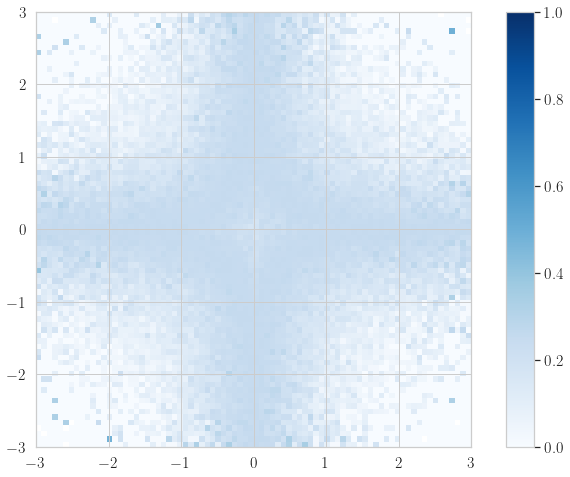

In [651]:
plt.figure(figsize=[8,8])
im = plt.imshow(H_top,cmap="Blues",extent=[-3,3,-3,3])
plt.clim(0,1)
cax = plt.axes([0.95, 0.125, 0.05,0.755 ])
plt.colorbar(mappable=im, cax=cax)
plt.savefig('img/2d_bininng_brier_top.pdf', bbox_inches='tight')

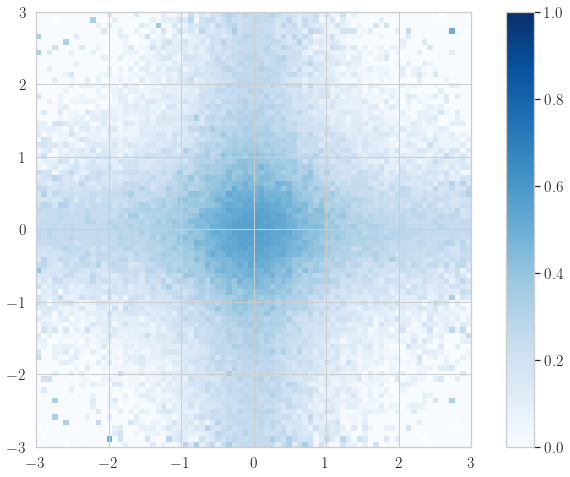

In [652]:
plt.figure(figsize=[8,8])
im = plt.imshow(H_true,cmap="Blues",extent=[-3,3,-3,3])
plt.clim(0,1)
cax = plt.axes([0.95, 0.125, 0.05,0.755 ])
plt.colorbar(mappable=im, cax=cax)
plt.savefig('img/2d_bininng_brier_true.pdf', bbox_inches='tight')

# Adding label shift

In [464]:
X, y = generate_2d_4_class_example([0.2, 0.3, 0.1, 0.4], mu_0, mu_1, mu_2, mu_3, 2500)

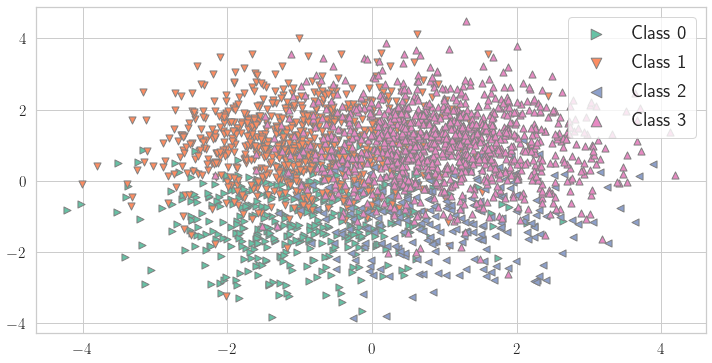

In [465]:
plt.figure(figsize=[12, 6])
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            edgecolor="gray",
            marker='>',
            label='Class 0',
            s=50)
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            edgecolor="gray",
            marker='v',
            label='Class 1',
            s=50)
plt.scatter(X[y == 2, 0],
            X[y == 2, 1],
            edgecolor="gray",
            marker='<',
            label='Class 2',
            s=50)
plt.scatter(X[y == 3, 0],
            X[y == 3, 1],
            edgecolor="gray",
            marker='^',
            label='Class 3',
            s=50)

plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
plt.show()
# plt.savefig('img/not_well_sep_data_vis.pdf', bbox_inches='tight')

In [359]:
pred_probs = clf.predict_proba(X)

In [360]:
brier_classic = brier_scores(y,pred_probs,n_classes=4)
brier_top = modified_brier_scores(y,pred_probs,n_classes=4)
brier_true = loss_double(y,pred_probs,n_classes=4)

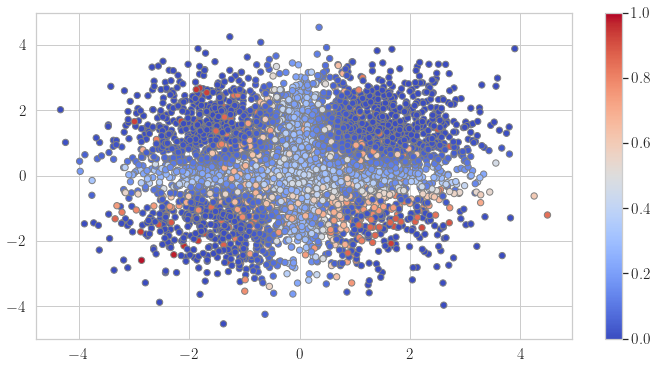

In [361]:
plt.figure(figsize=[12, 6])
plt.scatter(
    X[:, 0],
    X[:, 1],
    edgecolor="gray",
    s=40,
    c=brier_classic,
    cmap='coolwarm')
plt.clim(0, 1)
plt.colorbar()
# plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
# plt.show()
plt.savefig('img/4class_brier_classic_label_shift.pdf', bbox_inches='tight')

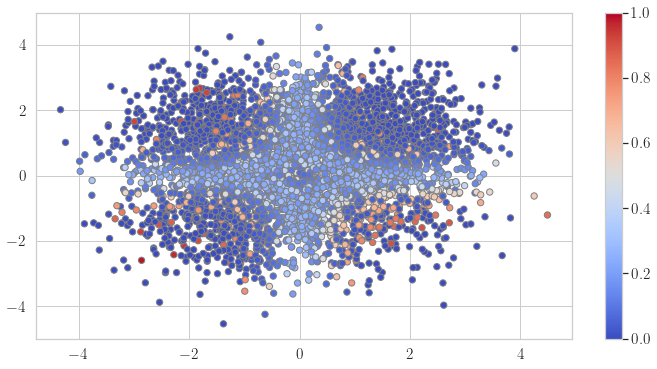

In [362]:
plt.figure(figsize=[12, 6])
plt.scatter(
    X[:, 0],
    X[:, 1],
    edgecolor="gray",
    s=40,
    c=brier_top,
    cmap='coolwarm')
plt.clim(0, 1)
plt.colorbar()
# plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
# plt.show()
plt.savefig('img/4class_brier_top_label_shift.pdf', bbox_inches='tight')

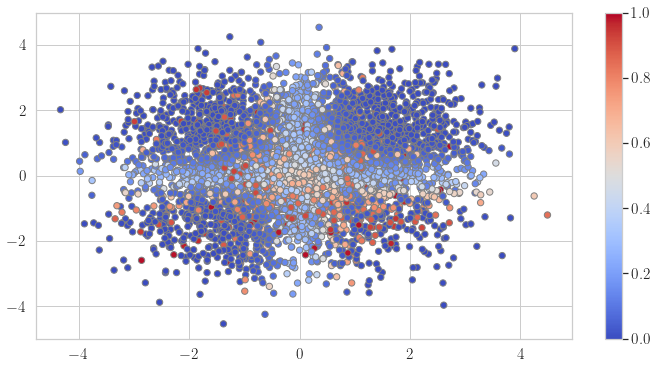

In [364]:
plt.figure(figsize=[12, 6])
plt.scatter(
    X[:, 0],
    X[:, 1],
    edgecolor="gray",
    c=brier_true,
    s=40,
    cmap='coolwarm')
plt.clim(0, 1)
plt.colorbar()
# plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
# plt.xlim([-5, 5])
# plt.ylim([-3, 3])
# plt.show()

plt.savefig('img/4class_brier_true_label_shift.pdf', bbox_inches='tight')

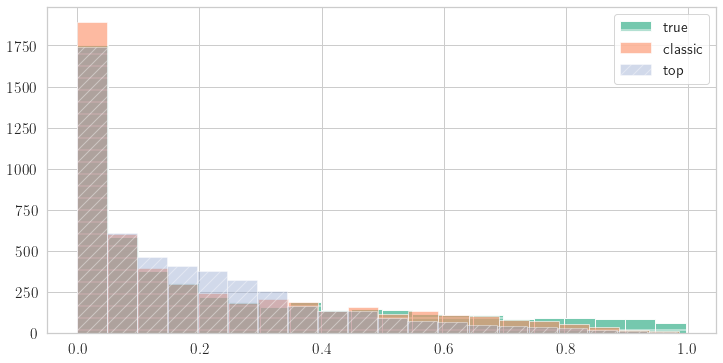

In [365]:
plt.hist(brier_true, alpha=0.9, bins=20, hatch='-', label='true')
plt.hist(brier_classic, alpha=0.6, bins=20, label='classic')
plt.hist(brier_top, alpha=0.4, bins=20, hatch='//', label='top')
plt.legend()

In [ ]:
n_x_bins, n_y_bins = 25,20
x_boundary_1, x_boundary_2 = -6,6 
y_boundary_1, y_boundary_2 = -4,6

# Condition number

In [32]:
from utils.tests import brier_scores,top_label_brier_scores,true_class_brier_scores

In [33]:
def generate_class_props(underlying_prob='unif',
                         n_classes=4,
                         eps_lower=0.1,
                         eps_upper=0.9):
    prob_source = np.random.dirichlet(np.ones(n_classes))
    #rescale and normalize
    prob_source = np.maximum(prob_source, eps_lower)
    prob_source = np.minimum(prob_source, eps_upper)
    prob_source /= sum(prob_source)
    #same for the target
    prob_target = np.random.dirichlet(np.ones(n_classes))
    prob_target = np.maximum(prob_target, eps_lower)
    prob_target = np.minimum(prob_target, eps_upper)
    prob_target /= sum(prob_target)
    #compute condition number
    class_props = prob_target / prob_source
    cond_number = max(class_props) / min(class_props)
    return prob_source, prob_target, cond_number

In [34]:
prob_s,prob_t,con_num = generate_class_props()

In [35]:
clf = four_classes_LDA_predictor()
clf.mean_class_0 = mu_0
clf.mean_class_1 = mu_1
clf.mean_class_2 = mu_2
clf.mean_class_3 = mu_3
clf.cov_mat = np.eye(2)
clf.class_prop = prob_s

In [36]:
X, y = generate_2d_4_class_example(prob_t, mu_0, mu_1, mu_2, mu_3, 5000)

In [37]:
pred_probs = clf.predict_proba(X)

brier_classic = brier_scores(y,pred_probs,n_classes=4)
brier_top = top_label_brier_scores(y,pred_probs,n_classes=4)
brier_true = true_class_brier_scores(y,pred_probs,n_classes=4)

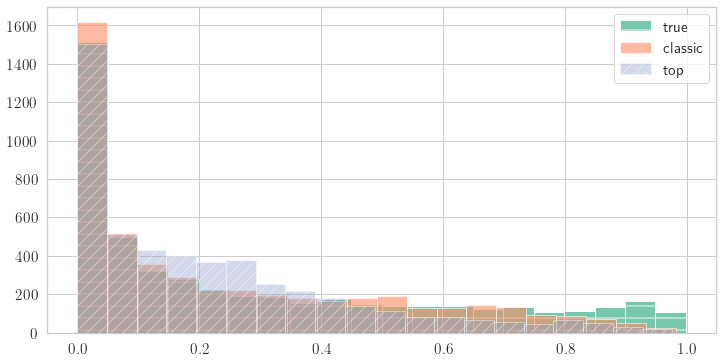

In [38]:
plt.hist(brier_true, alpha=0.9, bins=20, hatch='-', label='true')
plt.hist(brier_classic, alpha=0.6, bins=20, label='classic')
plt.hist(brier_top, alpha=0.4, bins=20, hatch='//', label='top')
plt.legend()

In [108]:
cond_nums = list()
mean_brier_classic = list()
mean_brier_top = list()
mean_brier_true = list()
mean_brier_classic_cube = list()
mean_brier_top_cube = list()
mean_brier_true_cube = list()

In [109]:
glob_sims = 500

In [110]:
for i in range(glob_sims):
    prob_s, prob_t, cur_con_num = generate_class_props(eps_lower=0.15,
                                                       eps_upper=0.85)
    cond_nums += [cur_con_num]
    clf.class_prop = prob_s
    X_source, y_source = generate_2d_4_class_example(prob_s, mu_0, mu_1, mu_2,
                                                     mu_3, 4000)
    X_target, y_target = generate_2d_4_class_example(prob_t, mu_0, mu_1, mu_2,
                                                     mu_3, 4000)
    #track those that are inside a unit cube
    points_inside_source = (X_source[:, 0] >= -0.5) * (X_source[:, 0] <= 0.5) * (
        X_source[:, 1] >= -0.5) * (X_source[:, 1] <= 1)
    points_inside_target = (X_target[:, 0] >= -0.5) * (X_target[:, 0] <= 0.5) * (
        X_target[:, 1] >= -0.5) * (X_target[:, 1] <= 1)
    pred_probs_target = clf.predict_proba(X_target)
    pred_probs_source = clf.predict_proba(X_source)
    #losses on target
    brier_classic_target = brier_scores(y_target,
                                        pred_probs_target,
                                        n_classes=4)
    brier_top_target = top_label_brier_scores(y_target,
                                              pred_probs_target,
                                              n_classes=4)
    brier_true_target = true_class_brier_scores(y_target,
                                                pred_probs_target,
                                                n_classes=4)
    #losses on source
    brier_classic_source = brier_scores(y_source,
                                        pred_probs_source,
                                        n_classes=4)
    brier_top_source = top_label_brier_scores(y_source,
                                              pred_probs_source,
                                              n_classes=4)
    brier_true_source = true_class_brier_scores(y_source,
                                                pred_probs_source,
                                                n_classes=4)
    mean_brier_classic += [
        np.mean(brier_classic_target) / np.mean(brier_classic_source) - 1
    ]
    mean_brier_top += [
        np.mean(brier_top_target) / np.mean(brier_top_source) - 1
    ]
    mean_brier_true += [
        np.mean(brier_true_target) / np.mean(brier_true_source) - 1
    ]

    mean_brier_classic_cube += [
        np.mean(brier_classic_target[points_inside_target]) /
        np.mean(brier_classic_source[points_inside_source]) - 1
    ]
    mean_brier_top_cube += [
        np.mean(brier_top_target[points_inside_target]) /
        np.mean(brier_top_source[points_inside_source]) - 1
    ]
    mean_brier_true_cube += [
        np.mean(brier_true_target[points_inside_target]) /
        np.mean(brier_true_source[points_inside_source]) - 1
    ]

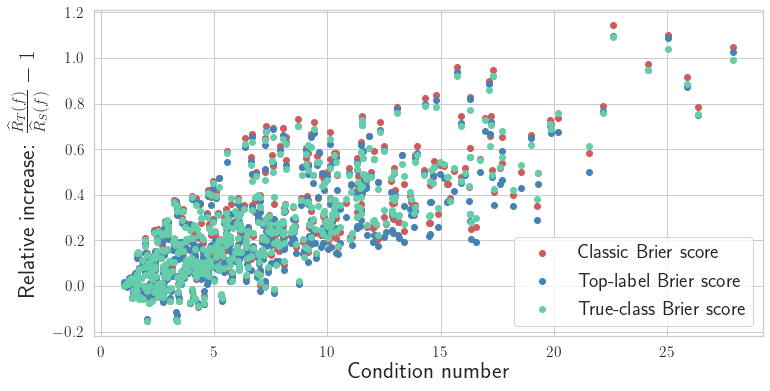

In [111]:
plt.scatter(cond_nums,mean_brier_classic, label='Classic Brier score', c='indianred')
plt.scatter(cond_nums,mean_brier_top, label='Top-label Brier score', c='steelblue')
plt.scatter(cond_nums,mean_brier_true, label='True-class Brier score', c='mediumaquamarine')

plt.legend(loc=4, prop={'size': 20})
plt.xlabel('Condition number', fontsize=23)
plt.ylabel('Relative increase: '+r'$\frac{\widehat{R}_T(f)}{\widehat{R}_S(f)}-1$', fontsize=23)
plt.savefig('img/brier_scores_cond_number.pdf', bbox_inches='tight')

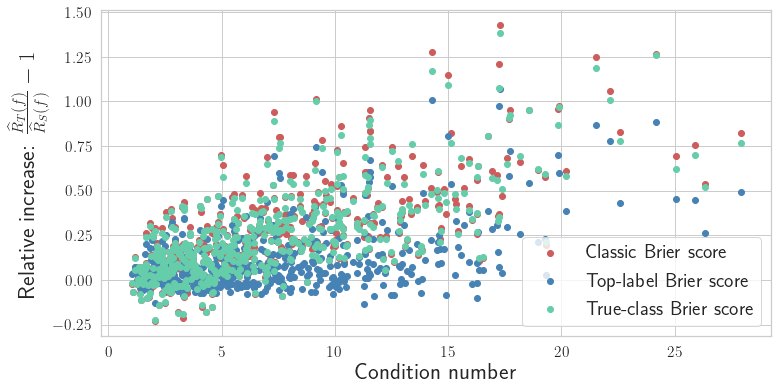

In [112]:
plt.scatter(cond_nums,mean_brier_classic_cube, label='Classic Brier score', c='indianred')
plt.scatter(cond_nums,mean_brier_top_cube, label='Top-label Brier score', c='steelblue')
plt.scatter(cond_nums,mean_brier_true_cube, label='True-class Brier score', c='mediumaquamarine')


plt.legend(loc=4, prop={'size': 20})
plt.xlabel('Condition number', fontsize=23)
plt.ylabel('Relative increase: '+r'$\frac{\widehat{R}_T(f)}{\widehat{R}_S(f)}-1$', fontsize=23)
plt.savefig('img/brier_scores_cond_number_cube.pdf', bbox_inches='tight')